In [50]:
# -*- coding: utf-8 -*-
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import label

In [7]:
base_path = '../dataset'
data_keys = ['stage1_train', 'stage1_test']
for key in data_keys:
    data_path = os.listdir('{}/{}'.format(base_path, key))
    print(len(data_path))

670
65


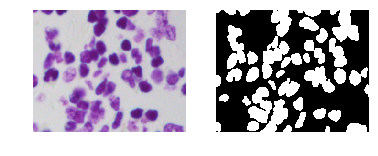

In [82]:
test_id = '00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e'

test_path = '{}/{}/{}/'.format(base_path, data_keys[0], test_id)
test_path = [test_path+sub_dir for sub_dir in os.listdir(test_path)]

# source image
img_dir = test_path[0] + '/' + os.listdir(test_path[0])[0]
source_img = plt.imread(img_dir)

# mark images
temp_image = []
for img in os.listdir(test_path[1]):
    temp_dir = test_path[1] + '/' + img
    if len(temp_image):
        temp_image += plt.imread(temp_dir)
    else:
        temp_image = plt.imread(temp_dir)

test_image = temp_image.copy()
ax = plt.figure()
plt.subplot(1, 2, 1), plt.imshow(source_img, cmap='gray'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(test_image, cmap='gray'), plt.axis('off')
plt.show()

In [46]:
# Run-length encoding stolen from https://www.kaggle.com/rakhlin/fast-run-length-encoding-python
def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def prob_to_rles(x, cutoff=0.5):
    lab_img = label(x > cutoff)
    for i in range(1, lab_img.max() + 1):
        yield rle_encoding(lab_img == i)

In [80]:
print(list(prob_to_rles(test_image))[0])

[1, 6, 257, 6, 513, 6, 769, 6, 1025, 6, 1281, 6, 1537, 5, 1793, 5, 2049, 4, 2305, 3, 2561, 2, 2817, 1]
